In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import LogNorm
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import  RBF


import Bgolearn.BGOsampling as BGOS 

 Bgolearn : A Bayesian global optimization package 
 10 Jul 2022, version 1, Bin Cao, MGI, SHU, Shanghai, CHINA.


In [2]:
def True_function(X):
    X = np.array(X)
    Y = 0.013*X**4 - 0.25*X**3 + 1.61*X**2 - 4.1*X + 8
    return Y

In [3]:
def generate_function(data, obs):
    print('------------12 original data-----------')
    data = np.array(data)
    # for one feature dataset
    data_matrix = np.array(data[:,0]).reshape(-1, 1)

    Measured_response = np.zeros(len(data_matrix))
    for i in range(obs):
        Measured_response += np.array(data[:,i+1])
    # for one feature dataset
    Measured_response = Measured_response/obs
    
    Measured_std = []
    for j in range(len(data_matrix)):
        std = np.std(np.array(data[j,1:1+obs]))
        Measured_std.append(std)
    Measured_std = np.array(Measured_std)  
    print('evaluated mean of y :', Measured_response)
    print('evaluated std of y :', Measured_std)
    print('---------------------------------------\n')
    return data_matrix,Measured_response,Measured_std

## design virtual samples

In [4]:
virtual_samples = np.linspace(0,11,100)

## define a callable Kriging model and sampling function

In [5]:
def Sam_function(X,real_std,obs):
    print('--------------Draw samples-------------')
    print('real std of added datum:', real_std)
    X = np.array(X)
    Y = np.zeros(1)
    Y_list = []
    for i in range(obs):
        __sam = 0.013*X**4 - 0.25*X**3 + 1.61*X**2 - 4.1*X + 8 + np.random.normal(loc=0.0, scale=real_std, size=None)
        Y_list.append(__sam)
        Y += __sam
        print(i+1,'-th sampling, result = ', __sam)
    cal_std = np.std(np.array(Y_list))
    print('evaluated mean of added datum:', Y/obs)
    print('evaluated std of added datum:', cal_std)
    print('---------------------------------------\n')
    return Y/obs, np.array(cal_std)


## instantiate Bgolearn

In [6]:
Bgolearn = BGOS.Bgolearn()
method_name = 'EQI'


------------12 original data-----------
evaluated mean of y : [6.21494888 5.56581958 4.61988109 4.34056442 4.35646479 4.67190767
 4.62173112 4.55605355 4.70138419 4.48867457 5.8769712  7.75473896]
evaluated std of y : [0.30008321 0.2742029  0.07394358 0.91538122 0.33136727 0.29720623
 0.07801782 0.48293232 0.24548787 0.12272781 0.21645983 0.25832216]
---------------------------------------

current optimal is : 4.251646319418976
The next datum recomended by Expected Quantile Improvement : 
 x =  [8.33333333]
--------------Draw samples-------------
real std of added datum: 0.5
1 -th sampling, result =  3.562432708583006
2 -th sampling, result =  3.690666039457674
3 -th sampling, result =  3.5506938020603376
evaluated mean of added datum: [3.60126418]
evaluated std of added datum: 0.0633980514207883
---------------------------------------

1-th iteration 
 new added datum: [8.3, array([3.6013])]


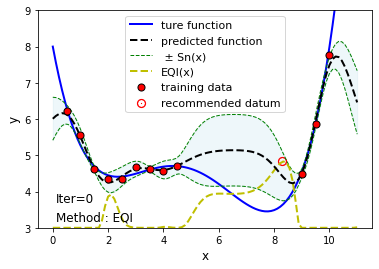

current optimal is : 3.606414946362623
The next datum recomended by Expected Quantile Improvement : 
 x =  [7.33333333]
--------------Draw samples-------------
real std of added datum: 0.6
1 -th sampling, result =  3.5943093746073607
2 -th sampling, result =  3.6446433089172126
3 -th sampling, result =  3.16192943635757
evaluated mean of added datum: [3.46696071]
evaluated std of added datum: 0.21666630736009396
---------------------------------------

2-th iteration 
 new added datum: [7.3, array([3.467])]


<Figure size 432x288 with 0 Axes>

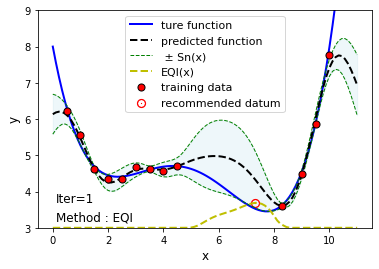

current optimal is : 3.530062575707964
The next datum recomended by Expected Quantile Improvement : 
 x =  [6.55555556]
--------------Draw samples-------------
real std of added datum: 0.5
1 -th sampling, result =  3.8533215838555828
2 -th sampling, result =  4.5186287493315715
3 -th sampling, result =  4.090608463574706
evaluated mean of added datum: [4.15418627]
evaluated std of added datum: 0.27530590112332237
---------------------------------------

3-th iteration 
 new added datum: [6.6, array([4.1542])]


<Figure size 432x288 with 0 Axes>

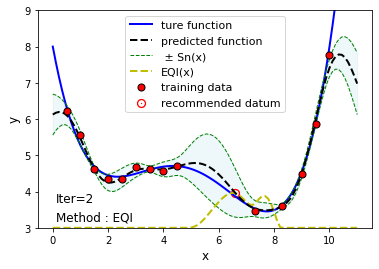

current optimal is : 3.5501493474015526
The next datum recomended by Expected Quantile Improvement : 
 x =  [7.66666667]
--------------Draw samples-------------
real std of added datum: 0.6
1 -th sampling, result =  3.0153968459243767
2 -th sampling, result =  3.535217293194416
3 -th sampling, result =  3.1715139309357667
evaluated mean of added datum: [3.24070936]
evaluated std of added datum: 0.217783270796839
---------------------------------------

4-th iteration 
 new added datum: [7.7, array([3.2407])]


<Figure size 432x288 with 0 Axes>

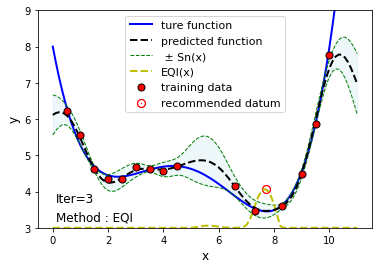

<Figure size 432x288 with 0 Axes>

In [8]:
obs = 3

data = pd.read_csv('data.csv')
data_matrix, Measured_response,Measured_std = generate_function(data,obs)
for i in range(500):
    plt.figure()
    ax1 = plt.subplot()
    ax1.set_ylim([3, 9])
    
   
    class Kriging_model(object):
        def fit_pre(self,xtrain,ytrain,xtest):
            # instantiated model
            kernel = RBF() 
            mdoel = GaussianProcessRegressor(kernel=kernel,normalize_y=True,alpha = Measured_std**2).fit(xtrain,ytrain)
            # defined the attribute's outputs
            mean,std = mdoel.predict(xtest,return_std=True)
            return mean,std  
    

    y_mean_pre,y_mean_std = Kriging_model().fit_pre(data_matrix, Measured_response, virtual_samples.reshape(-1,1))
    ax1.scatter(data_matrix,Measured_response,c='r',s=50,zorder=10,edgecolors=(0,0,0),label="training data")
    ax1.plot(virtual_samples,True_function(virtual_samples),'b',lw=2,label="ture function")
    ax1.plot(virtual_samples,y_mean_pre,'k--',lw=2,zorder=9,label="predicted function")
    ax1.fill_between(virtual_samples,y_mean_pre-y_mean_std,y_mean_pre+y_mean_std,alpha=0.2,color='lightblue')
    ax1.plot(virtual_samples,y_mean_pre-y_mean_std,'g--',lw=1,label=' ± Sn(x)') 
    ax1.plot(virtual_samples,y_mean_pre+y_mean_std,'g--',lw=1)

    
    Bgolearn = BGOS.Bgolearn()
    # min_search = False:  searching the global maximum
    model = Bgolearn.fit(Kriging_model,data_matrix,Measured_response,virtual_samples,opt_num = 1,min_search = True)
    # recall the utility function 
    _return = model.EQI(beta = 0.5,tao_new = 0.2)*10 + 3
    
    
    index = np.random.choice(np.flatnonzero(_return == _return.max()))
    recommend = virtual_samples[index]
    ax1.plot(virtual_samples,_return,'y--',lw=2,label='{name}(x)'.format(name = method_name))
    
    # give an intrinsic std to recommended datum
    sam_std = round(random.uniform(0.1,0.7),1)
    datum_y, datum_std = Sam_function(round(recommend,1),sam_std,obs)
    Measured_std = np.append(Measured_std,datum_std)
    data_matrix = np.append(data_matrix,np.round(recommend,1)).reshape(-1,1)
    Measured_response = np.append(Measured_response,np.round(datum_y,4))

    print("{num}-th iteration".format(num = i + 1),'\n', 'new added datum:',([np.round(recommend,1),np.round(datum_y,4)]))
    ax1.scatter(round(recommend,1),_return[index],c='red',s=1.5,linewidths=8,label="recommended datum") 
    
    
    plt.text(0.1,3.2,'Method : {name}'.format(name = method_name),fontsize=12,color='k')
    plt.text(0.1,3.7,'Iter={}'.format(i),fontsize=12,color='k')
    plt.xlabel('x',fontsize = 12)
    plt.ylabel('y',fontsize = 12)
    plt.legend(fontsize = 11)
    plt.savefig('{name}-obs_{obstime}-{num}.png'.format(name = method_name,obstime = obs,num = i),dpi=800)
    plt.show()
    plt.clf()
    if 7.6 <= round(recommend,1) <= 7.8:
        break
    elif i>=10:
        print('Searching is defeated')
        break

------------12 original data-----------
evaluated mean of y : [6.29185161 5.39856881 4.62623151 4.38385368 4.46148423 4.63694734
 4.5905237  4.59016103 4.67177078 4.4811777  5.95522378 7.80150911]
evaluated std of y : [0.29202661 0.37457828 0.06497479 0.79628133 0.33976528 0.26441507
 0.08652626 0.42238334 0.21869861 0.10707566 0.23132562 0.23792876]
---------------------------------------

current optimal is : 4.3718073781469755
The next datum recomended by Expected Quantile Improvement : 
 x =  [8.44444444]
--------------Draw samples-------------
real std of added datum: 0.6
1 -th sampling, result =  4.66356934790061
2 -th sampling, result =  3.6614866092028757
3 -th sampling, result =  3.4267601615496366
4 -th sampling, result =  4.381193805422736
evaluated mean of added datum: [4.03325248]
evaluated std of added datum: 0.5060645499651717
---------------------------------------

1-th iteration 
 new added datum: [8.4, array([4.0333])]


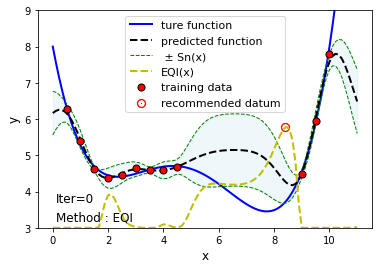

current optimal is : 4.084844521238656
The next datum recomended by Expected Quantile Improvement : 
 x =  [8.33333333]
--------------Draw samples-------------
real std of added datum: 0.3
1 -th sampling, result =  3.3781698304464842
2 -th sampling, result =  3.1535448424780226
3 -th sampling, result =  3.4479330267128225
4 -th sampling, result =  3.5597973044678763
evaluated mean of added datum: [3.38486125]
evaluated std of added datum: 0.14843578380482808
---------------------------------------

2-th iteration 
 new added datum: [8.3, array([3.3849])]


<Figure size 432x288 with 0 Axes>

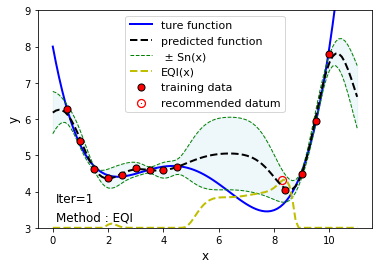

current optimal is : 3.454874146728166
The next datum recomended by Expected Quantile Improvement : 
 x =  [7.55555556]
--------------Draw samples-------------
real std of added datum: 0.4
1 -th sampling, result =  4.165545764762305
2 -th sampling, result =  3.094782036994892
3 -th sampling, result =  3.636690957054931
4 -th sampling, result =  3.671314365798055
evaluated mean of added datum: [3.64208328]
evaluated std of added datum: 0.37895750324810157
---------------------------------------

3-th iteration 
 new added datum: [7.6, array([3.6421])]


<Figure size 432x288 with 0 Axes>

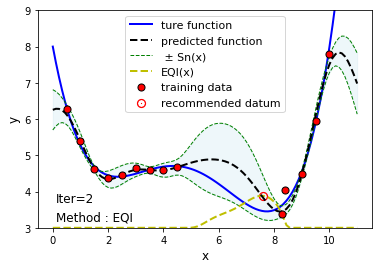

<Figure size 432x288 with 0 Axes>

In [11]:
obs = 4

data = pd.read_csv('data.csv')
data_matrix, Measured_response,Measured_std = generate_function(data,obs)
for i in range(500):
    plt.figure()
    ax1 = plt.subplot()
    ax1.set_ylim([3, 9])
    
   
    class Kriging_model(object):
        def fit_pre(self,xtrain,ytrain,xtest):
            # instantiated model
            kernel = RBF() 
            mdoel = GaussianProcessRegressor(kernel=kernel,normalize_y=True,alpha = Measured_std**2).fit(xtrain,ytrain)
            # defined the attribute's outputs
            mean,std = mdoel.predict(xtest,return_std=True)
            return mean,std  
    

    y_mean_pre,y_mean_std = Kriging_model().fit_pre(data_matrix, Measured_response, virtual_samples.reshape(-1,1))
    ax1.scatter(data_matrix,Measured_response,c='r',s=50,zorder=10,edgecolors=(0,0,0),label="training data")
    ax1.plot(virtual_samples,True_function(virtual_samples),'b',lw=2,label="ture function")
    ax1.plot(virtual_samples,y_mean_pre,'k--',lw=2,zorder=9,label="predicted function")
    ax1.fill_between(virtual_samples,y_mean_pre-y_mean_std,y_mean_pre+y_mean_std,alpha=0.2,color='lightblue')
    ax1.plot(virtual_samples,y_mean_pre-y_mean_std,'g--',lw=1,label=' ± Sn(x)') 
    ax1.plot(virtual_samples,y_mean_pre+y_mean_std,'g--',lw=1)

    
    Bgolearn = BGOS.Bgolearn()
    # min_search = False:  searching the global maximum
    model = Bgolearn.fit(Kriging_model,data_matrix,Measured_response,virtual_samples,opt_num = 1,min_search = True)
    # recall the utility function 
    _return = model.EQI(beta = 0.5,tao_new = 0.2)*10 + 3
    
    
    index = np.random.choice(np.flatnonzero(_return == _return.max()))
    recommend = virtual_samples[index]
    ax1.plot(virtual_samples,_return,'y--',lw=2,label='{name}(x)'.format(name = method_name))
    
    # give an intrinsic std to recommended datum
    sam_std = round(random.uniform(0.1,0.7),1)
    datum_y, datum_std = Sam_function(round(recommend,1),sam_std,obs)
    Measured_std = np.append(Measured_std,datum_std)
    data_matrix = np.append(data_matrix,np.round(recommend,1)).reshape(-1,1)
    Measured_response = np.append(Measured_response,np.round(datum_y,4))

    print("{num}-th iteration".format(num = i + 1),'\n', 'new added datum:',([np.round(recommend,1),np.round(datum_y,4)]))
    ax1.scatter(round(recommend,1),_return[index],c='red',s=1.5,linewidths=8,label="recommended datum") 
    
    
    plt.text(0.1,3.2,'Method : {name}'.format(name = method_name),fontsize=12,color='k')
    plt.text(0.1,3.7,'Iter={}'.format(i),fontsize=12,color='k')
    plt.xlabel('x',fontsize = 12)
    plt.ylabel('y',fontsize = 12)
    plt.legend(fontsize = 11)
    plt.savefig('{name}-obs_{obstime}-{num}.png'.format(name = method_name,obstime = obs,num = i),dpi=800)
    plt.show()
    plt.clf()
    if 7.6 <= round(recommend,1) <= 7.8:
        break
    elif i>=10:
        print('Searching is defeated')
        break

------------12 original data-----------
evaluated mean of y : [6.38302126 5.47159103 4.62333861 4.45561327 4.45288222 4.66633633
 4.60958967 4.62022357 4.74050698 4.45448135 5.94232697 7.79008494]
evaluated std of y : [0.31854553 0.36548063 0.05840252 0.72653212 0.30438189 0.24369472
 0.0862756  0.38254565 0.23908561 0.10964916 0.20850551 0.21403299]
---------------------------------------

current optimal is : 4.352956863309499
The next datum recomended by Expected Quantile Improvement : 
 x =  [8.44444444]
--------------Draw samples-------------
real std of added datum: 0.2
1 -th sampling, result =  3.906108618421419
2 -th sampling, result =  3.9540919302304243
3 -th sampling, result =  3.6532193597831295
4 -th sampling, result =  3.632344981357689
5 -th sampling, result =  3.830890324755438
evaluated mean of added datum: [3.79533104]
evaluated std of added datum: 0.13076799290790206
---------------------------------------

1-th iteration 
 new added datum: [8.4, array([3.7953])]


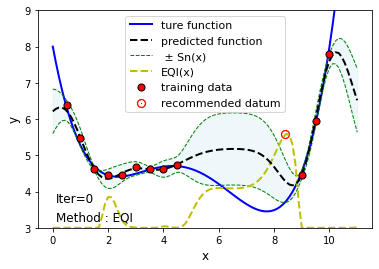

current optimal is : 3.8089565076306418
The next datum recomended by Expected Quantile Improvement : 
 x =  [7.33333333]
--------------Draw samples-------------
real std of added datum: 0.5
1 -th sampling, result =  3.2933073533227857
2 -th sampling, result =  3.6642443113796617
3 -th sampling, result =  3.73641036477353
4 -th sampling, result =  3.077778673052313
5 -th sampling, result =  3.9650165108852864
evaluated mean of added datum: [3.54735144]
evaluated std of added datum: 0.3190261159491754
---------------------------------------

2-th iteration 
 new added datum: [7.3, array([3.5474])]


<Figure size 432x288 with 0 Axes>

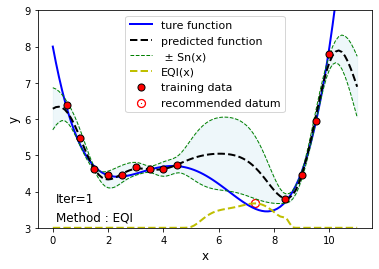

current optimal is : 3.680320153250366
The next datum recomended by Expected Quantile Improvement : 
 x =  [6.66666667]
--------------Draw samples-------------
real std of added datum: 0.4
1 -th sampling, result =  3.6716564289982876
2 -th sampling, result =  4.75617524970944
3 -th sampling, result =  3.5924614329512408
4 -th sampling, result =  3.3867223062103466
5 -th sampling, result =  3.4933463918798426
evaluated mean of added datum: [3.78007236]
evaluated std of added datum: 0.49732580286024697
---------------------------------------

3-th iteration 
 new added datum: [6.7, array([3.7801])]


<Figure size 432x288 with 0 Axes>

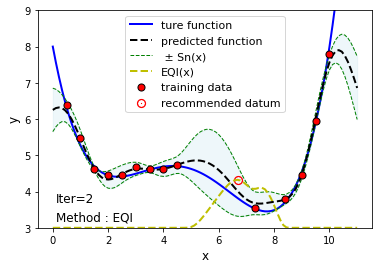

current optimal is : 3.655402342419296
The next datum recomended by Expected Quantile Improvement : 
 x =  [7.33333333]
--------------Draw samples-------------
real std of added datum: 0.7
1 -th sampling, result =  2.68967287144414
2 -th sampling, result =  3.9521171612541033
3 -th sampling, result =  2.4454163108610016
4 -th sampling, result =  3.5805428065215668
5 -th sampling, result =  3.3865743536738635
evaluated mean of added datum: [3.2108647]
evaluated std of added datum: 0.5611672040915638
---------------------------------------

4-th iteration 
 new added datum: [7.3, array([3.2109])]


<Figure size 432x288 with 0 Axes>

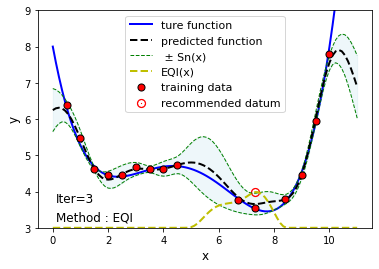

current optimal is : 3.567340302982366
The next datum recomended by Expected Quantile Improvement : 
 x =  [7.33333333]
--------------Draw samples-------------
real std of added datum: 0.2
1 -th sampling, result =  3.4894469568099162
2 -th sampling, result =  3.4653800280988607
3 -th sampling, result =  3.8636179441358838
4 -th sampling, result =  3.527588116530443
5 -th sampling, result =  3.545515942347834
evaluated mean of added datum: [3.5783098]
evaluated std of added datum: 0.1453950492041785
---------------------------------------

5-th iteration 
 new added datum: [7.3, array([3.5783])]


<Figure size 432x288 with 0 Axes>

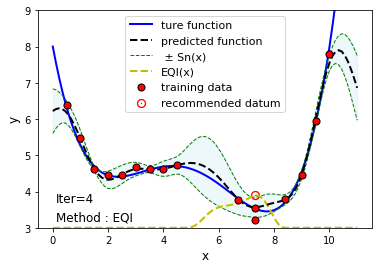

current optimal is : 3.575469236371068
The next datum recomended by Expected Quantile Improvement : 
 x =  [6.55555556]
--------------Draw samples-------------
real std of added datum: 0.2
1 -th sampling, result =  4.3993292893802565
2 -th sampling, result =  3.4672334290826163
3 -th sampling, result =  3.4086962633587055
4 -th sampling, result =  3.944654241171655
5 -th sampling, result =  3.927985117013229
evaluated mean of added datum: [3.82957967]
evaluated std of added datum: 0.3622093477559906
---------------------------------------

6-th iteration 
 new added datum: [6.6, array([3.8296])]


<Figure size 432x288 with 0 Axes>

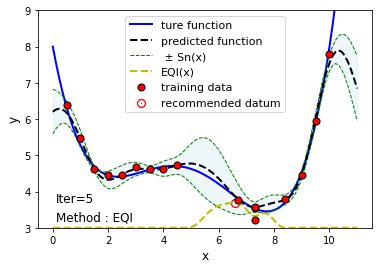

current optimal is : 3.575053976874721
The next datum recomended by Expected Quantile Improvement : 
 x =  [7.55555556]
--------------Draw samples-------------
real std of added datum: 0.1
1 -th sampling, result =  3.415903807595475
2 -th sampling, result =  3.5064334142361893
3 -th sampling, result =  3.753215149052384
4 -th sampling, result =  3.5351867238153227
5 -th sampling, result =  3.5019803468230895
evaluated mean of added datum: [3.54254389]
evaluated std of added datum: 0.11262644915947978
---------------------------------------

7-th iteration 
 new added datum: [7.6, array([3.5425])]


<Figure size 432x288 with 0 Axes>

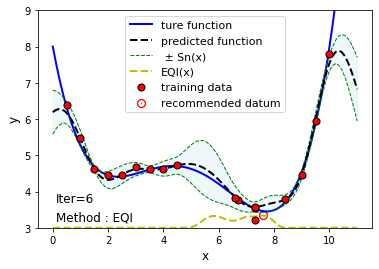

<Figure size 432x288 with 0 Axes>

In [12]:
obs = 5

data = pd.read_csv('data.csv')
data_matrix, Measured_response,Measured_std = generate_function(data,obs)
for i in range(500):
    plt.figure()
    ax1 = plt.subplot()
    ax1.set_ylim([3, 9])
    
   
    class Kriging_model(object):
        def fit_pre(self,xtrain,ytrain,xtest):
            # instantiated model
            kernel = RBF() 
            mdoel = GaussianProcessRegressor(kernel=kernel,normalize_y=True,alpha = Measured_std**2).fit(xtrain,ytrain)
            # defined the attribute's outputs
            mean,std = mdoel.predict(xtest,return_std=True)
            return mean,std  
    

    y_mean_pre,y_mean_std = Kriging_model().fit_pre(data_matrix, Measured_response, virtual_samples.reshape(-1,1))
    ax1.scatter(data_matrix,Measured_response,c='r',s=50,zorder=10,edgecolors=(0,0,0),label="training data")
    ax1.plot(virtual_samples,True_function(virtual_samples),'b',lw=2,label="ture function")
    ax1.plot(virtual_samples,y_mean_pre,'k--',lw=2,zorder=9,label="predicted function")
    ax1.fill_between(virtual_samples,y_mean_pre-y_mean_std,y_mean_pre+y_mean_std,alpha=0.2,color='lightblue')
    ax1.plot(virtual_samples,y_mean_pre-y_mean_std,'g--',lw=1,label=' ± Sn(x)') 
    ax1.plot(virtual_samples,y_mean_pre+y_mean_std,'g--',lw=1)

    
    Bgolearn = BGOS.Bgolearn()
    # min_search = False:  searching the global maximum
    model = Bgolearn.fit(Kriging_model,data_matrix,Measured_response,virtual_samples,opt_num = 1,min_search = True)
    # recall the utility function 
    _return = model.EQI(beta = 0.5,tao_new = 0.2)*10 + 3
    
    
    index = np.random.choice(np.flatnonzero(_return == _return.max()))
    recommend = virtual_samples[index]
    ax1.plot(virtual_samples,_return,'y--',lw=2,label='{name}(x)'.format(name = method_name))
    
    # give an intrinsic std to recommended datum
    sam_std = round(random.uniform(0.1,0.7),1)
    datum_y, datum_std = Sam_function(round(recommend,1),sam_std,obs)
    Measured_std = np.append(Measured_std,datum_std)
    data_matrix = np.append(data_matrix,np.round(recommend,1)).reshape(-1,1)
    Measured_response = np.append(Measured_response,np.round(datum_y,4))

    print("{num}-th iteration".format(num = i + 1),'\n', 'new added datum:',([np.round(recommend,1),np.round(datum_y,4)]))
    ax1.scatter(round(recommend,1),_return[index],c='red',s=1.5,linewidths=8,label="recommended datum") 
    
    
    plt.text(0.1,3.2,'Method : {name}'.format(name = method_name),fontsize=12,color='k')
    plt.text(0.1,3.7,'Iter={}'.format(i),fontsize=12,color='k')
    plt.xlabel('x',fontsize = 12)
    plt.ylabel('y',fontsize = 12)
    plt.legend(fontsize = 11)
    plt.savefig('{name}-obs_{obstime}-{num}.png'.format(name = method_name,obstime = obs,num = i),dpi=800)
    plt.show()
    plt.clf()
    if 7.6 <= round(recommend,1) <= 7.8:
        break
    elif i>=10:
        print('Searching is defeated')
        break